In [22]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: print("Install pyqula with\npip install --upgrade pyqula") # pyqula must be installed

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'coolwarm'

# parallelization
# from pyqula import parallel ; parallel.set_cores("max") # uncomment to use all the cores

import numpy as np

# Moire electronic states and twisted van der Waals heterostructures
In this session we will address several examples highlighting the physics of moire systems

### Contents
- Electronic structure folding in supercells
- Folding in 2D moire potentials
- Fermi surface reconstruction by moire potentials
- Topological states driven by a moire pattern
- Correlated states driven by a moire pattern
- Electronic structure of graphene multilayers

### Learning outcomes
- Identify the role of band structure folding in moire systems
- Understand which strategies allow generating flat bands with moire potentials
- Understand how a moire potential can drive a topological or correlated state


## Folded electronic structure of a 1D linear chain
We will start showing how the bands of a linear chain get folded when creating a supercell

([], [])

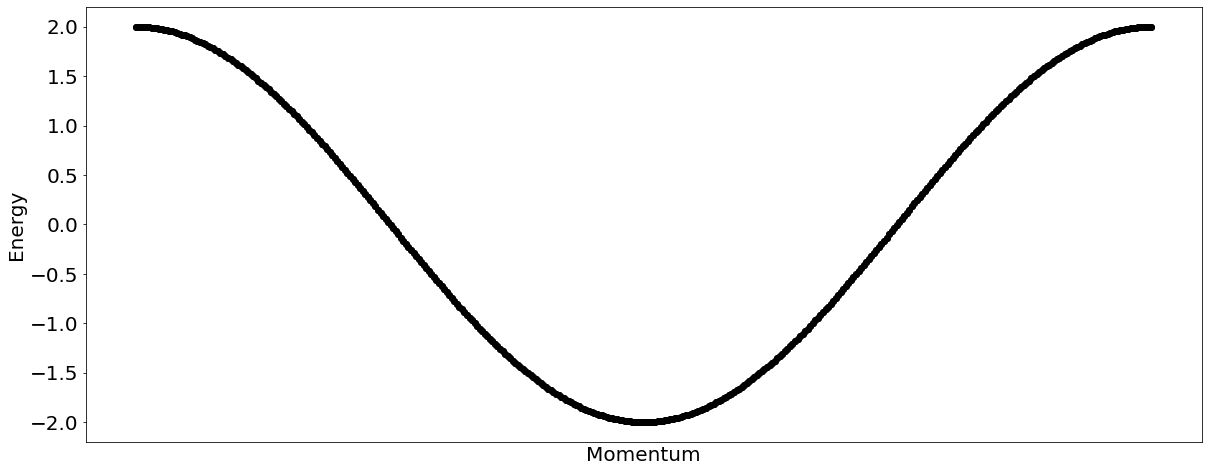

In [2]:
from pyqula import geometry
g = geometry.chain() # generate a chain
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Discuss is the analytic form of the electronic disperison for a one dimensional chain

We now compute the band structure taking several atoms per unit cell

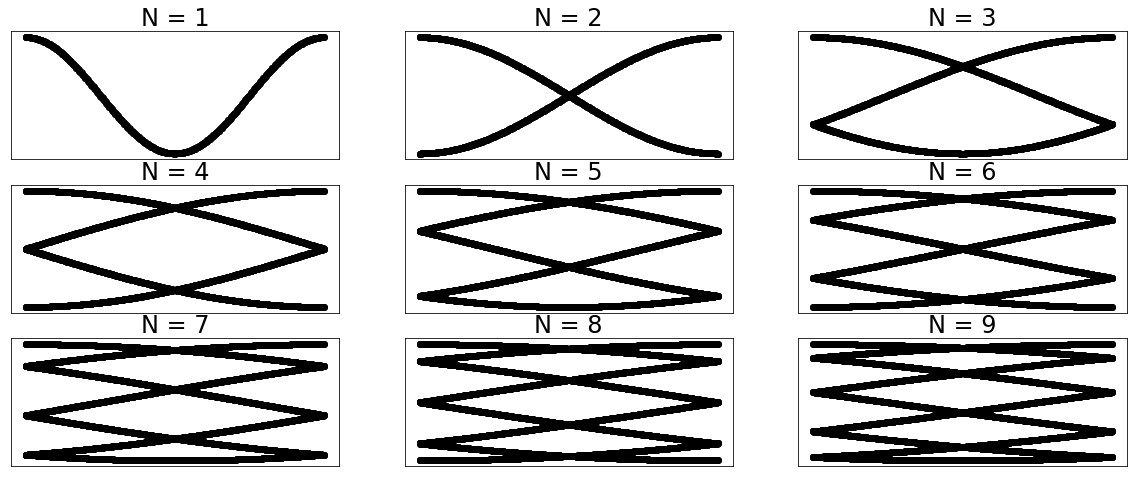

In [3]:
NS = 9 # maximum number of sites per unit cell
ii = 1 # counter for the subplots
for n in range(1,NS+1):
    g = geometry.chain() # generate a chain
    g = g.get_supercell(n) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (k,e) = h.get_bands() # compute band structure
    plt.subplot(NS//3,3,ii); ii += 1 
    plt.title("N = "+str(ii-1)) # set the title
    plt.scatter(k,e,c="black") ; plt.yticks([]) ; plt.xticks([]) # plot

Let us now focus on a relatively big unit cell (N=10), and see what happens if we introduce a moire potential

Text(0, 0.5, ' y & onsite energy')

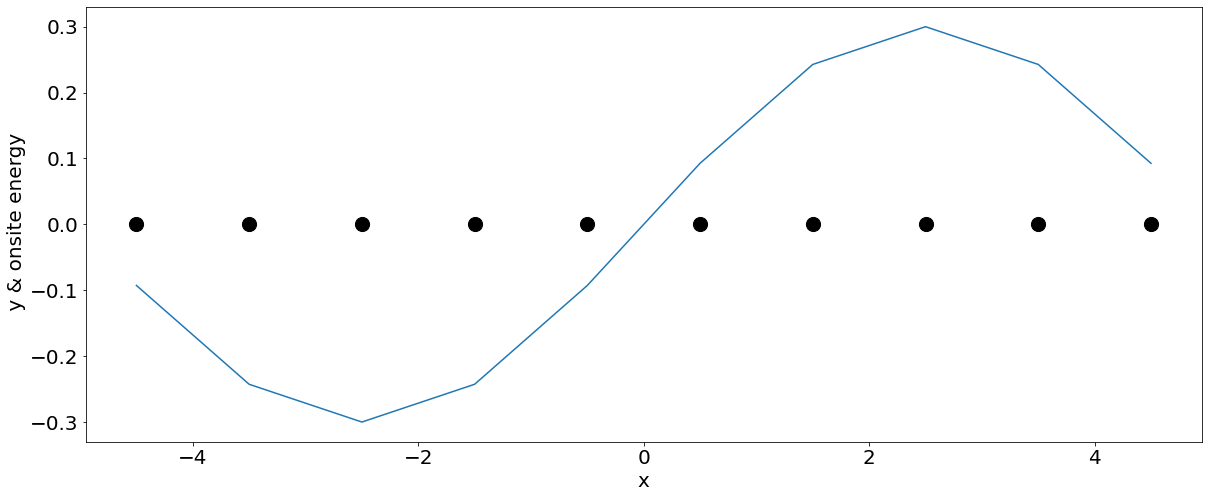

In [4]:
# first, let us just plot how a potential looks like
g = geometry.chain() # generate chain
N = 10 # size of the supercell
g = g.get_supercell(N) # generate a supercell with N sites
h = g.get_hamiltonian() # and generate the Hamiltonian

# let us define a potential that is commensurate with the lattice
fpot = lambda r: 0.3*np.sin(np.pi*2.*r[0]/N) # just a cosine potential

plt.scatter(g.r[:,0],g.r[:,1],c="black",s=200) # scatter the sites
plt.plot(g.r[:,0], [fpot(ri) for ri in g.r] ) # plot the potential
plt.xlabel("x") ; plt.ylabel(" y & onsite energy")

(-2.2, -1.0)

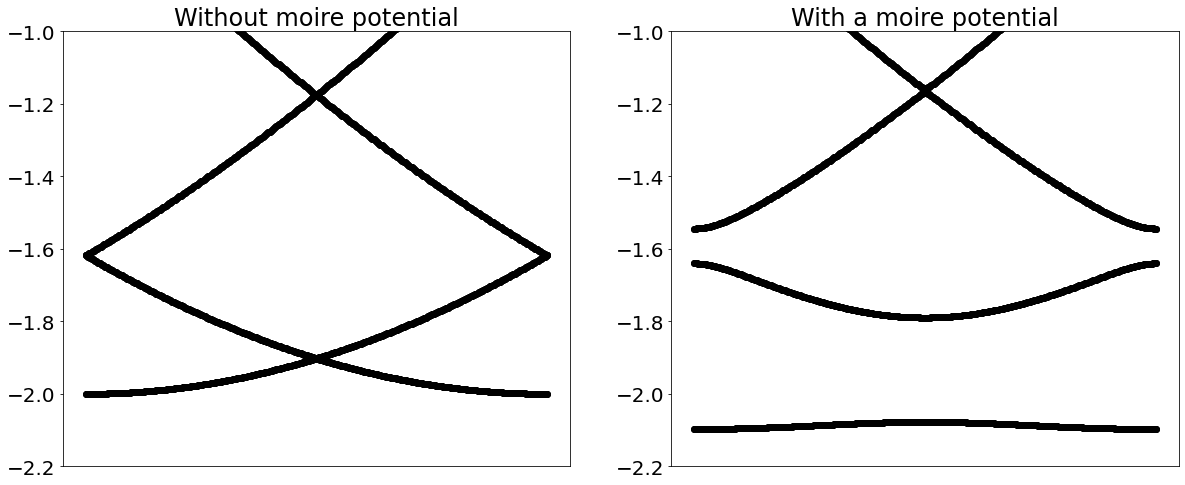

In [5]:
g = geometry.chain() # generate chain
N = 10 # size of the supercell
g = g.get_supercell(N) # generate a supercell with N sites
h = g.get_hamiltonian() # and generate the Hamiltonian

# let us define a potential that is commensurate with the lattice
fpot = lambda r: 0.3*np.sin(np.pi*2.*r[0]/N) # just a cosine potential

# as reference, plot the bands without the potential
plt.subplot(1,2,1)
plt.title("Without moire potential") # set the title
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xticks([]) ; plt.ylim([-2.2,-1]) # plot

# now add the potential and recompute the bands
plt.subplot(1,2,2)
plt.title("With a moire potential") # set the title
h.add_onsite(fpot) # and add an onsite modulation following this profile
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xticks([]) ; plt.ylim([-2.2,-1])# plot

### Exercise
- Estimate how strong has to be the perturbation to create a nearly flat moire band for N=10
- If you change the size of the unit cell (to N=20 for example), which value of the moire potential generates a flat band?

### Emergence of van Hove singularities due to the moire
As we switch on a moire potential, a set of van Hove singularities appear, stemming from the flattened bands created by the folding and anticrossing

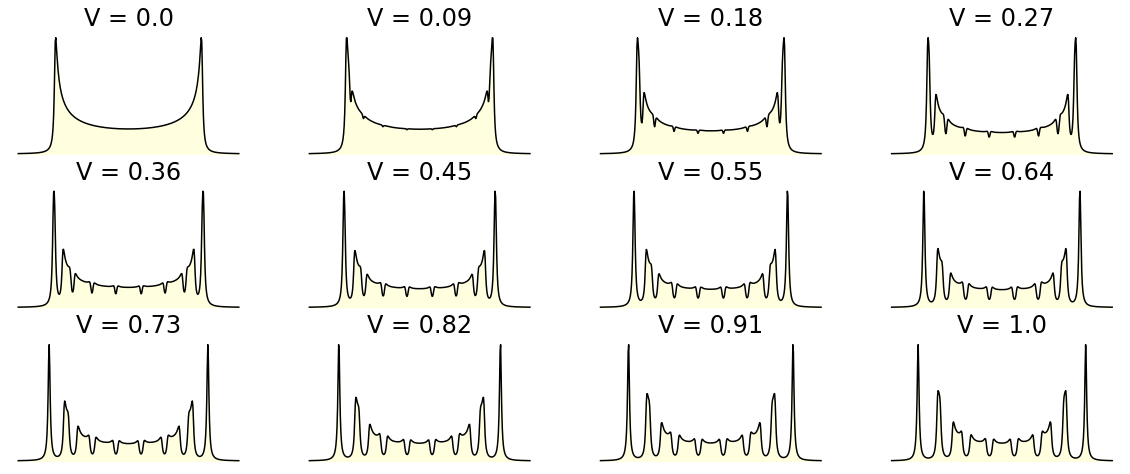

In [6]:
Nv = 12 ; Vs = np.linspace(0.,1.0,Nv) # potential strengths
N = 30 # size of the supercell
ii = 1 # counter for the subplots
for V in Vs:
    g = geometry.chain() # generate a chain
    g = g.get_supercell(n) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    h.add_onsite(lambda r: V*np.sin(np.pi*2.*r[0]/N)) # just a cosine potential
    (e,d) = h.get_dos(energies = np.linspace(-3.,3.,400),delta=3e-2) # compute DOS
    plt.subplot(Nv//4,4,ii); ii += 1 
    plt.title("V = "+str(np.round(V,2))) # set the title
    plt.plot(e,d,c="black") ; plt.axis("off") ; plt.xticks([]) # plot
    plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background

## Electronic structure unfolding
Increasing the number of sites in the unit cell increases the number of bands. However, in certain cases we are interested in knowing how the moire bands are unfolded to the original Brillouin zone. This can be done using the unfolding operator as shown below for a supercell without a moire potential. Fat red dots depict the weight of the bands unfolded to the original Brillouin zone.

([], [])

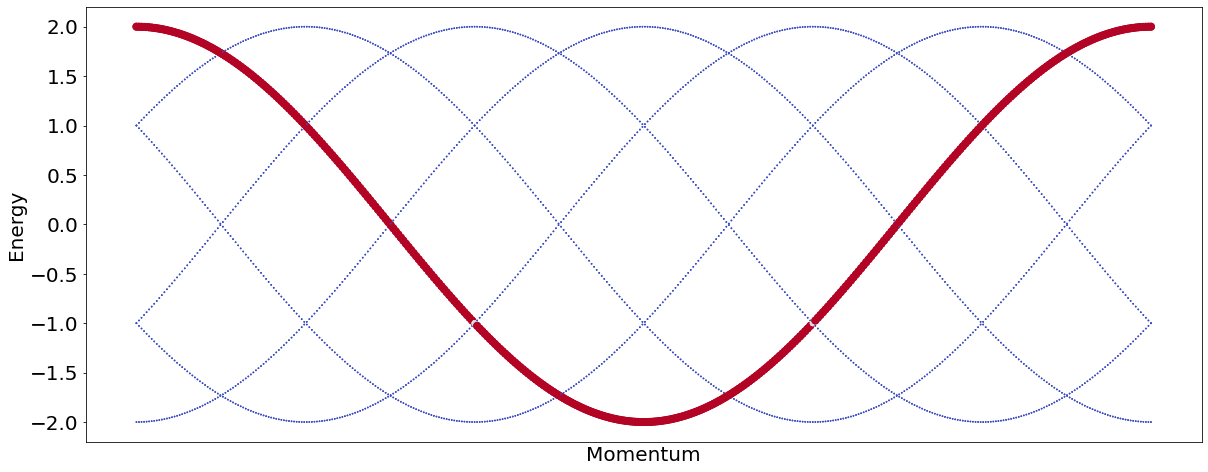

In [7]:
g = geometry.chain() # generate chain
N = 6 # size of the supercell
g = g.get_supercell(N,store_primal=True) # generate a supercell, store_primal is required for unfolding
h = g.get_hamiltonian() # and generate the Hamiltonian

# let us define a potential that is commensurate with the lattice
fpot = lambda r: .0*np.sin((N-1)*np.pi*2.*r[0]/N) # just a cosine potential (with zero amplitude)

h.add_onsite(fpot) # and add an onsite modulation following this profile
kpath = g.get_kpath()*N # compute in the original Brillouin zone, just by extending the reciprocal vectors
(k,e,c) = h.get_bands(operator="unfold",kpath=kpath) # compute band structure
plt.scatter(k,e,c=c,s=c*8+.5) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Switch on the moire potential in the previous example, and show how the flat bands emerge from certain parts of the original Brillouin zone

([], [])

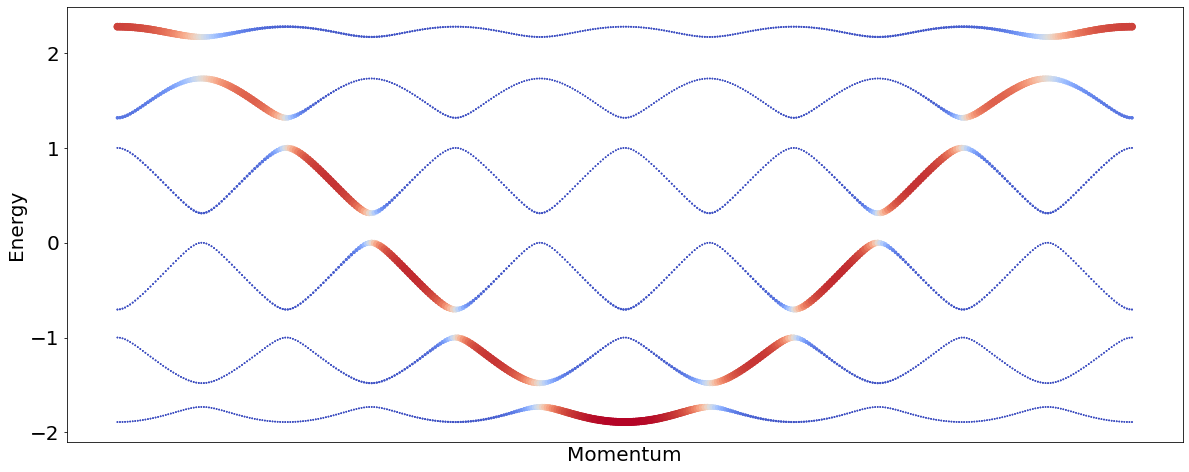

In [8]:
# let us now add an impurity in the previous supercell, and see how it leads to anticrossings in the bands
g = geometry.chain() # generate chain
N = 6 # size of the supercell
g = g.get_supercell(N,store_primal=True) # generate a supercell, store_primal is required for unfolding
h = g.get_hamiltonian() # and generate the Hamiltonian

# let us define a potential for an impurity
r0 = g.r[0] # location of the impurity
fpot = lambda r: 1.*(((r-r0).dot(r-r0))<1e-2) # impurity in site r0
# from pyqula import potentials ; fpot = potentials.impurity(r0,1.) # this is equivalent

h.add_onsite(fpot) # and add the impurity potential
kpath = g.get_kpath()*N # compute in the original Brillouin zone, just by extending the reciprocal vectors
(k,e,c) = h.get_bands(operator="unfold",kpath=kpath) # compute band structure
plt.scatter(k,e,c=c,s=c*8+.5) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Change the size of the supercell. Do the anticrossings appear at the same energies?
- If the strength of the impurity becomes very large, what happens to the electronic structure? Discuss why it has the behavior observed

## Moire electronic structure in 2D
We now move on to the case of 2D systems. We will see that in two-dimensions, flat bands and van Hove singularities also emerge due to a moire potenial.

### Moire bands in the triangular lattice
We will start by looking at how moire bands emerge in a triangular lattice

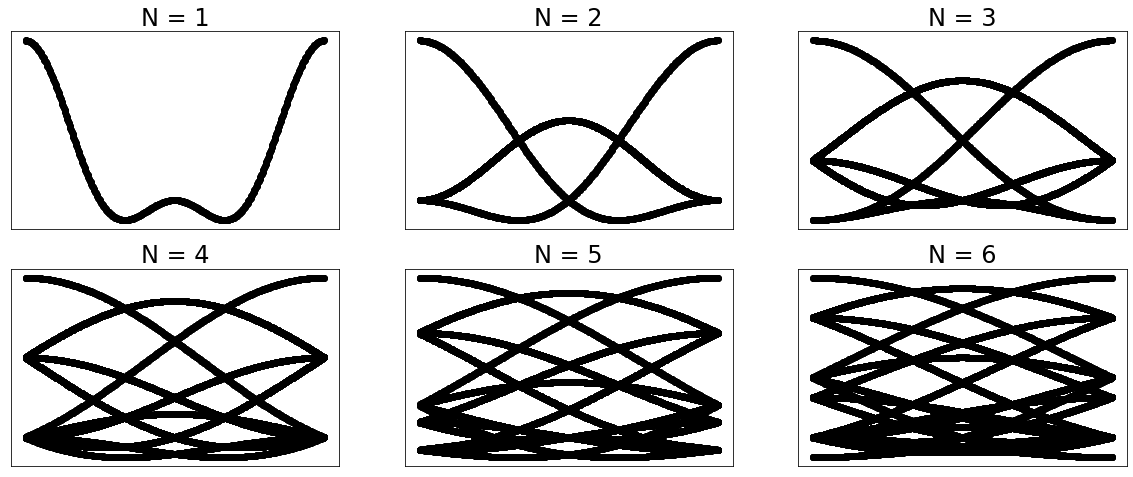

In [9]:
# Let us first look at how the bands are folded

NS = 6 # size of the supercell
ii = 1 # counter for the subplots
for n in range(1,NS+1):
    g = geometry.triangular_lattice() # generate a chain
    g = g.get_supercell((n,n)) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (k,e) = h.get_bands() # compute band structure
    plt.subplot(NS//3,3,ii); ii += 1 
    plt.title("N = "+str(ii-1)) # set the title
    plt.scatter(k,e,c="black") ; plt.yticks([]) ; plt.xticks([]) ; plt.xticks([]) # plot

### Exercise
- Show how the band folding is for a square and honeycomb lattices
- Is the density of states equivalent for the different supercells?
- How many bands do you expect for each supercell?

## Fermi surface folding in 2D
Let us now see how the fermi surface gets folded as we make supercells

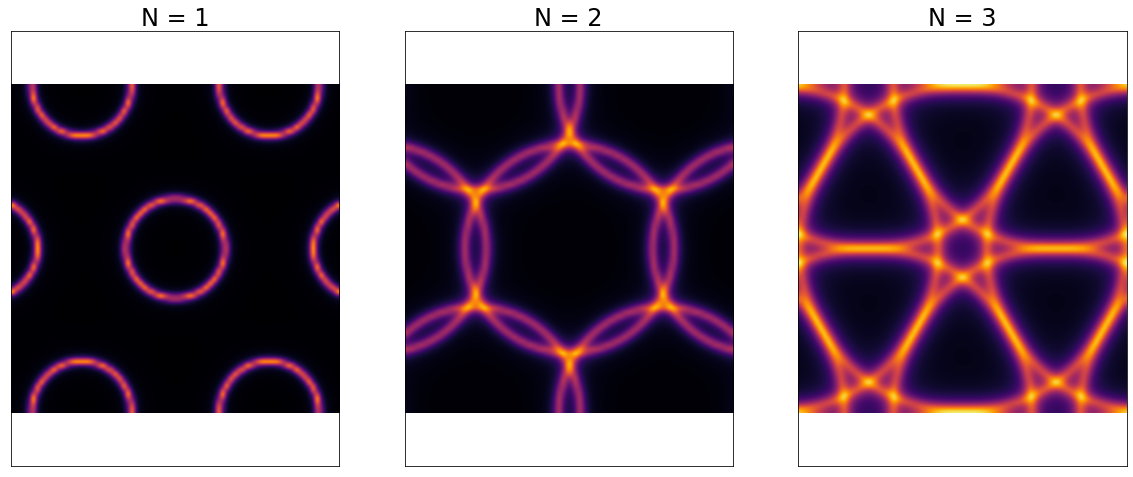

In [10]:
NS = 3 # size of the supercell
ii = 1 # counter for the subplots
filling = 0.7 # pick the same filling
for n in range(1,NS+1):
    g = geometry.triangular_lattice() # generate a chain
    g = g.get_supercell((n,n)) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    h.set_filling(filling) # set this filling 
    plt.subplot(NS//3,3,ii); ii += 1 
    nk = 80 ;  delta  = 20/nk # number of kpoints and energy smearing for the Fermi surface
    (x,y,d) = h.get_fermi_surface(delta=delta,nk=nk)
    d2d = d.reshape((nk,nk)) ; plt.imshow(d2d,vmin=0.,cmap="inferno",interpolation="bicubic") 
    plt.axis("equal") ; plt.xticks([]) ; plt.yticks([]) 
    plt.title("N = "+str(ii-1)) # set the title

### Exercise
- Compute the band folding of the Fermi surface at different fillings
- Compute the band folding of the Fermi surface for a square lattice

## Commensurate potentials
Let us now see how a commensurate potential looks like in 2D

(-48.67499999999999, 48.67499999999998, -28.10252435280503, 28.102524352805034)

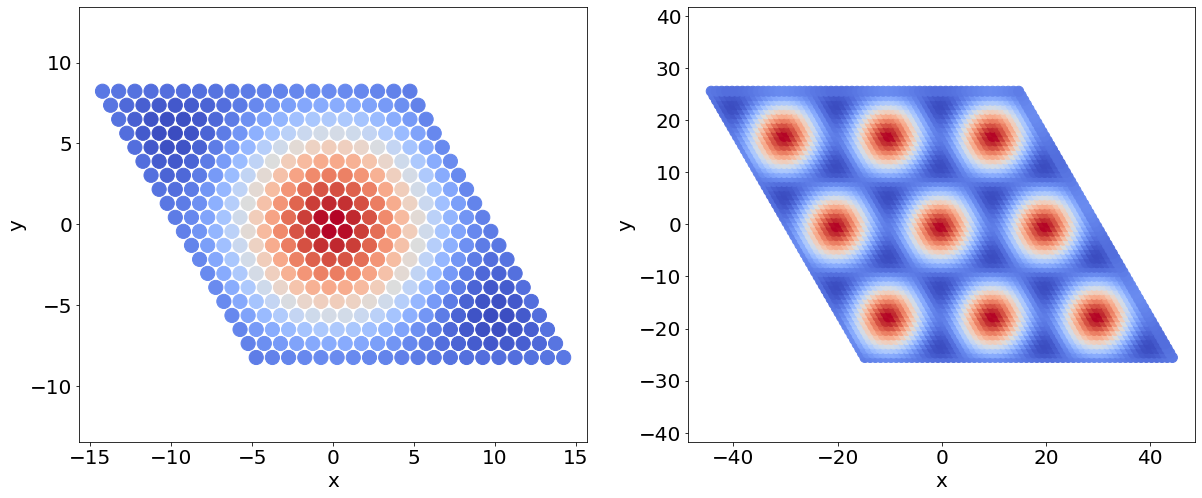

In [11]:
# let us now plot a commensurate potential in a supercell
# since writing a commensurate potential for 2D is harder, we will use the potentials library
from pyqula import potentials
N = 20 # size of the supercell
g = geometry.triangular_lattice() # generate a chain
g = g.get_supercell((N,N)) # generate a supercell
fpot = potentials.commensurate_potential(g,minmax=[-1.,1.],k=1)
# plot one unit cell
plt.subplot(1,2,1)
plt.scatter(g.r[:,0],g.r[:,1],c=[fpot(ri) for ri in g.r],s=200) # scatter the sites
plt.xlabel("x") ; plt.ylabel("y") ; plt.axis("equal")
# and plot several supercells
plt.subplot(1,2,2) 
gs = g.get_supercell((3,3)) # make a supercell of the supercell
plt.scatter(gs.r[:,0],gs.r[:,1],c=[fpot(ri) for ri in gs.r],s=100) # scatter the sites
plt.xlabel("x") ; plt.ylabel("y") ; plt.axis("equal")

### Exercise
- Plot a commensurate potential for a square lattice using the example above

## Flat bands stemming from a moire potential
Let us now see how including a moire potential in the model gives rise to the emergence of flat bands

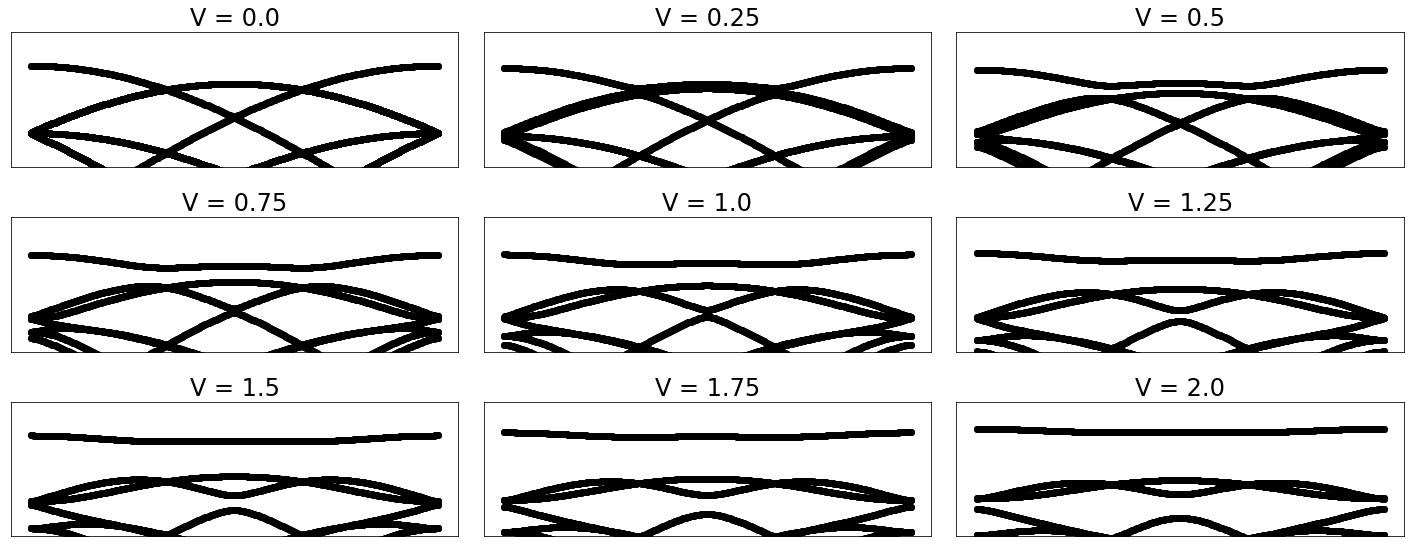

In [12]:
Nv = 9 ; Vs = np.linspace(0.,2.0,Nv) # potential strengths
N = 6 # size of the supercell
ii = 1 # counter for the subplots
for V in Vs:
    g = geometry.triangular_lattice() # generate a chain
    g = g.get_supercell((N,N)) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    fpot = potentials.commensurate_potential(g,minmax=[-V,V])
    h.add_onsite(fpot) # just a cosine potential
    plt.subplot(Nv//3,3,ii); ii += 1 
    (k,e) = h.get_bands() # compute band structure
    plt.title("V = "+str(np.round(V,2))) # set the title
    plt.scatter(k,e,c="black") ; plt.yticks([]) ; plt.xticks([]) ; plt.ylim([3,7]) # plot
plt.tight_layout() 

### Exercise
- Discuss how the critical value for obtaining a flat band depends on the size of the supercell

## Electronic structure unfolding of a triangular lattice
We will now add a commensurate potential to a triangular lattice, and unfold its electronic structure

([], [])

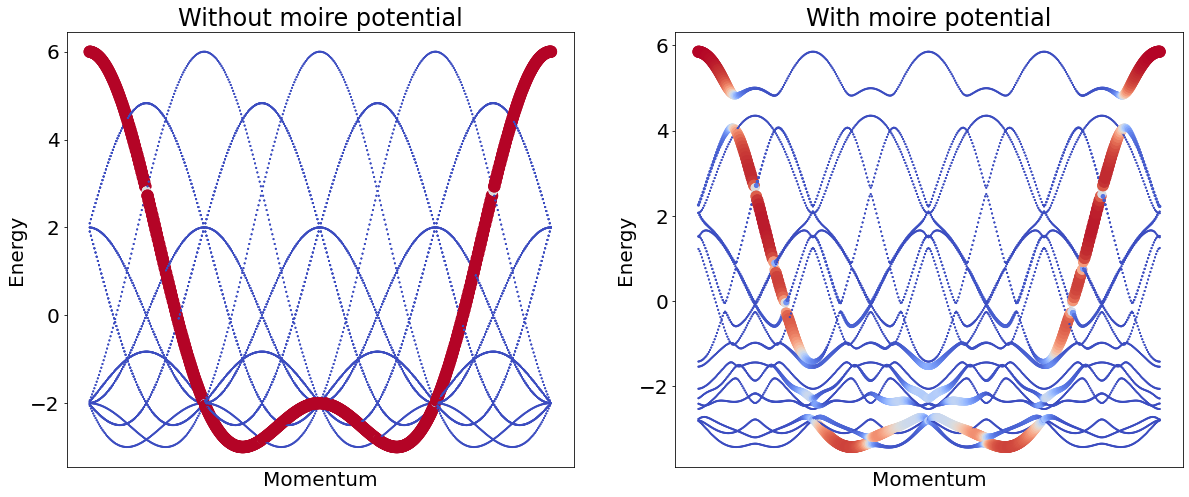

In [13]:
from pyqula import potentials
g = geometry.triangular_lattice() # generate chain
N = 4 # size of the supercell
g = g.get_supercell((N,N),store_primal=True) # generate a supercell, store_primal is required for unfolding
h = g.get_hamiltonian() # and generate the Hamiltonian
kpath = g.get_kpath()*N # compute in the original Brillouin zone, just by extending the reciprocal vectors

plt.subplot(1,2,1)
plt.title("Without moire potential")
(k,e,c) = h.get_bands(operator="unfold",kpath=kpath) # compute band structure
plt.scatter(k,e,c=c,s=c*8+1.) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

plt.subplot(1,2,2)
plt.title("With moire potential")
# let us define a potential that is commensurate with the lattice
fpot = potentials.commensurate_potential(g,minmax=[-1.,1.])
h.add_onsite(fpot) # and add an onsite modulation following this profile
(k,e,c) = h.get_bands(operator="unfold",kpath=kpath) # compute band structure
plt.scatter(k,e,c=c,s=c*8+1.) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

## Localization of moire states
Let us now look at how moire states get localized as the strength of a moire potential is increased

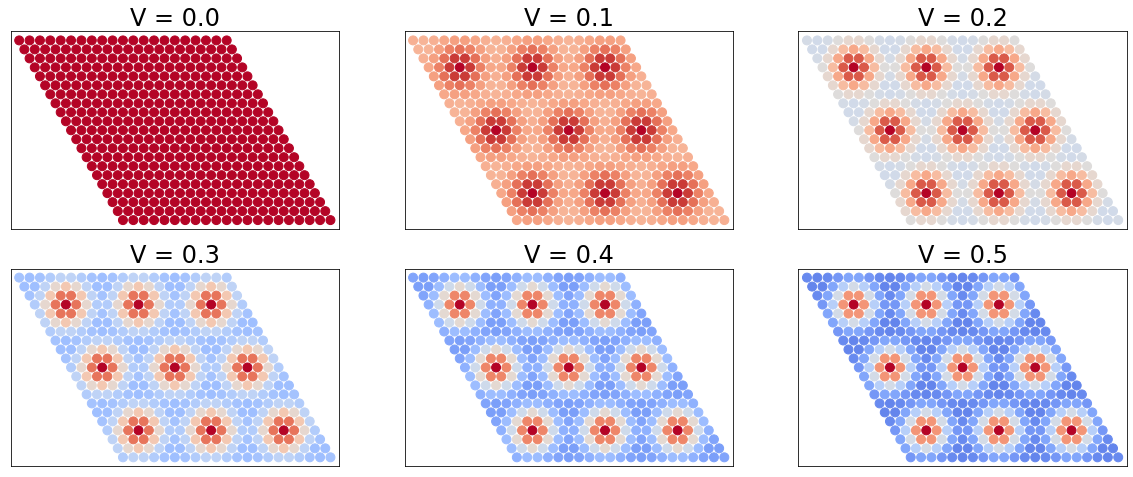

In [14]:
Nv = 6 ; Vs = np.linspace(0.,0.5,Nv) # potential strengths
N = 7 # size of the supercell
ii = 1 # counter for the subplots
for V in Vs:
    g = geometry.triangular_lattice() # generate a chain
    g = g.get_supercell((N,N)) # generate a supercell
    h = g.get_hamiltonian() # generate the Hamiltonian
    fpot = potentials.commensurate_potential(g,minmax=[-V,V])
    h.add_onsite(fpot) # just a cosine potential
    h.set_filling(1.-.5/N**2) # half hole per moire unit cell
    plt.subplot(Nv//3,3,ii); ii += 1 
    (x,y,d) = h.get_ldos(nrep=3,delta=1e-2) # compute the local density of states of the lowest band
    plt.title("V = "+str(np.round(V,2))) # set the title
    plt.scatter(x,y,c=d,vmin=0.,vmax=np.max(d),s=80) ;  plt.axis("equal") ; plt.xticks([]) ; plt.yticks([]) # plot

### Exercise
- Compute the localization of the lowest band for a moire potential in the square lattice

## Electronic structure folding by impurities
Let us now explore how moire minibands appear due to a periodic arrangement of impurities

([], [])

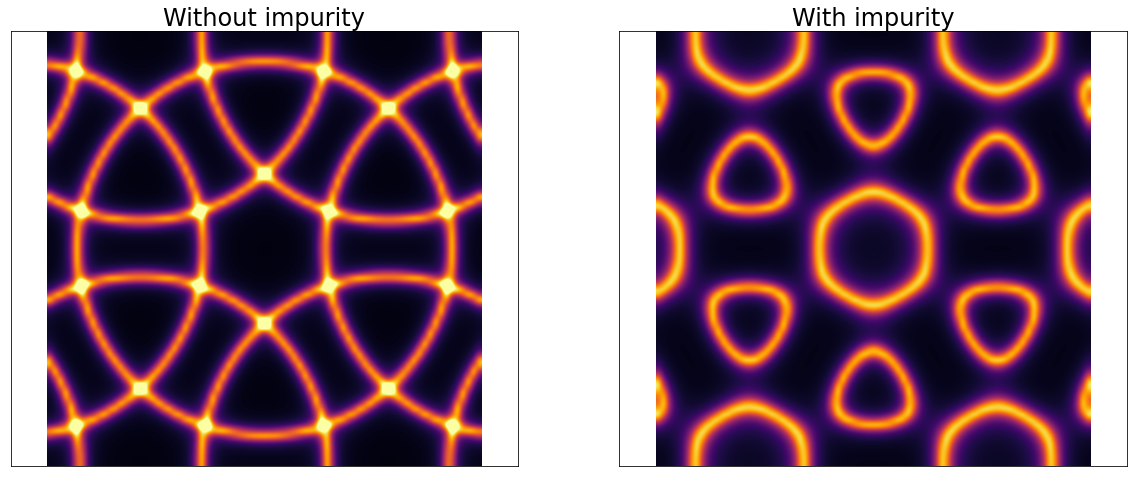

In [15]:
## Impurity lattice in two dimensions
from pyqula import potentials
g = geometry.triangular_lattice() # generate chain
N = 3 # size of the supercell
filling = 1.-2./N**2 # filling of the supercell
nk = 80 # number of kpoints for the Fermi surface
delta = 10./nk # smearing for the Fermi surface
g = g.get_supercell((N,N)) # generate a supercell, store_primal is required for unfolding
h = g.get_hamiltonian() # and generate the Hamiltonian


# first the pristine case
plt.subplot(1,2,1)
plt.title("Without impurity")
h.set_filling(filling) # one electron per supercell
(x,y,d) = h.get_fermi_surface(delta=delta,nk=nk)
d2d = d.reshape((nk,nk)) ; plt.imshow(d2d,vmin=0.,vmax=2./delta,cmap="inferno",interpolation="bicubic") 
plt.axis("equal") ; plt.xticks([]) ; plt.yticks([]) 


# go to the impurity case
plt.subplot(1,2,2)
plt.title("With impurity")
# let us define a potential that is commensurate with the lattice
fpot = potentials.impurity(g.r[0],v=3.)
h.add_onsite(fpot) # and add an onsite modulation following this profile
h.set_filling(filling) # one electron per supercell
(x,y,d) = h.get_fermi_surface(delta=delta,nk=nk)
d2d = d.reshape((nk,nk)) ; plt.imshow(d2d,vmin=0.,vmax=2./delta,cmap="inferno",interpolation="bicubic") 
plt.axis("equal") ; plt.xticks([]) ; plt.yticks([]) 


### Exercise
- Show how the topology of the folded Fermi surface changes at other fillings of the supercell

## Electronic structure of twisted graphene bilayers
We now move on to consider the electronic structure of twisted graphene bilayers. In these systems, the modulation of the interlayer hopping in space naturally gives rise to a moire pattern. For convenience, we will use a library that directly allows us to generate those Hamiltonians

Theta 6.008983197766148


(-40.52346669591518, 40.43268256601484, -23.58987910983725, 23.589879109837266)

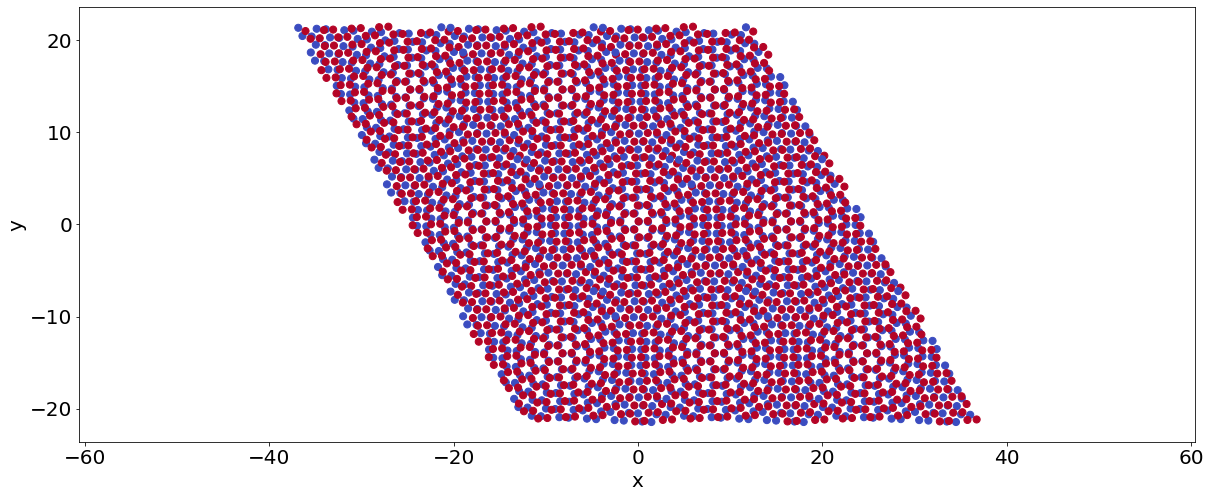

In [16]:
from pyqula import specialhamiltonian
n = 5 # integer controlling the twist angle (the bigger n, the smaller the angle)
h = specialhamiltonian.tbg(n=n) # generate Hamiltonian of a twisted graphene bilayer
# let us first plot the geometry
gs = h.geometry.get_supercell((3,3)) # extract the geometry and make a supercell
plt.scatter(gs.r[:,0],gs.r[:,1],c=gs.r[:,2],s=50) # scatter the sites
plt.xlabel("x") ; plt.ylabel("y") ; plt.axis("equal")

Theta 6.008983197766148


([], [])

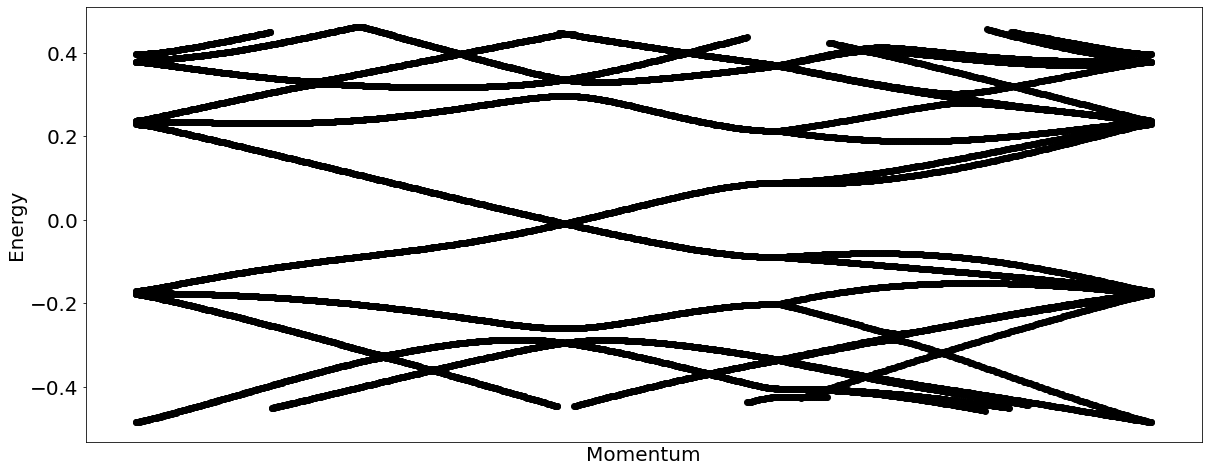

In [17]:
from pyqula import specialhamiltonian
n = 5 # integer controlling the twist angle (the bigger n, the smaller the angle)
ti = 0.4 # interlayer hopping, real value for graphene multilayers is around 0.15
h = specialhamiltonian.tbg(n=n,ti=ti,has_spin=False) # generate Hamiltonian of a twisted graphene bilayer
h.set_filling(.5,nk=2) # put at half filling
(k,e) = h.get_bands(num_bands=20,kpath=["G","K","M","G"]) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Compute the band structure for vanishing interlayer coupling
- Compare the band structures for stronger interlayer hopping. What happens if you increase its value for the unit cell of the example above?

## Localized modes in twisted graphene bilayers
Let us now show how the morie bands in twisted bilayer graphene give rise to localized modes in the supercell

Theta 6.008983197766148


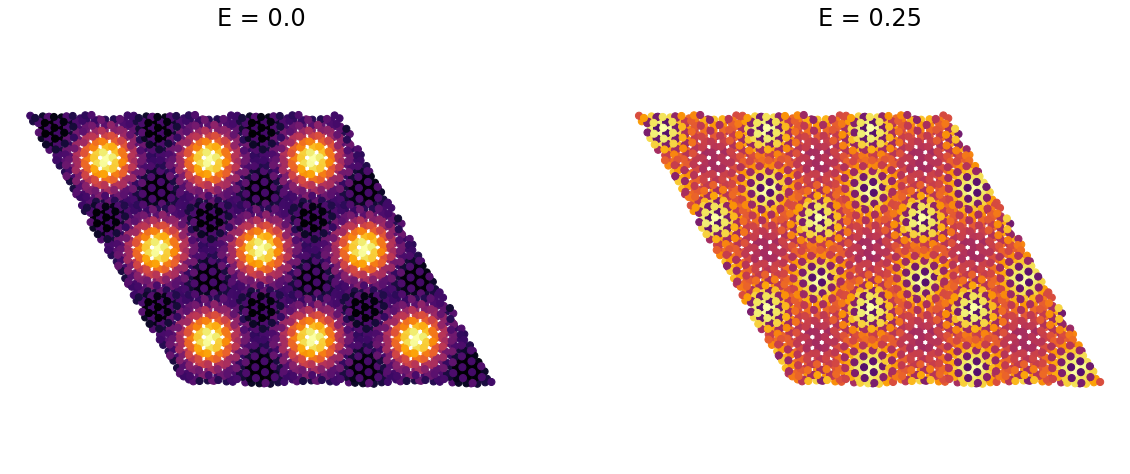

In [18]:
from pyqula import specialhamiltonian
n = 5 # integer controlling the twist angle (the bigger n, the smaller the angle)
ti = 0.4 # interlayer hopping, real value for graphene multilayers is around 0.15
h = specialhamiltonian.tbg(n=n,ti=ti,has_spin=False) # generate Hamiltonian of a twisted graphene bilayer
h.set_filling(.5,nk=2) # put at half filling

energies = np.linspace(0.,0.25,2) # different energies
ie = 1 # counter
for energy in energies:
    plt.subplot(1,len(energies),ie) ; ie += 1 # subplot
    (x,y,d) = h.get_ldos(e=energy,num_bands=10,nk=10,delta=1e-2,nrep=3) # compute local density of states
    d = d/np.max(d) # normalize
    plt.scatter(x,y,vmin=0.4,c=d,s=50,cmap="inferno") # scatter the sites
    plt.title("E = "+str(np.round(energy,2))) 
    plt.xlabel("x") ; plt.ylabel("y") ; plt.axis("equal") ; plt.axis("off")

### Exercise
- Make the interlayer hopping weaker. Do the states become more or less localized?
- Plot the LDOS at different energies, and discuss which different profiles you observe

## Moire-enabled topological states
Let us now address how moire patterns allow creating new topological states in an electronic structure. We will focus on a Chern insulator engineered with exchange field and Rashba spin-orbit coupling.

(-1.0, 1.0)

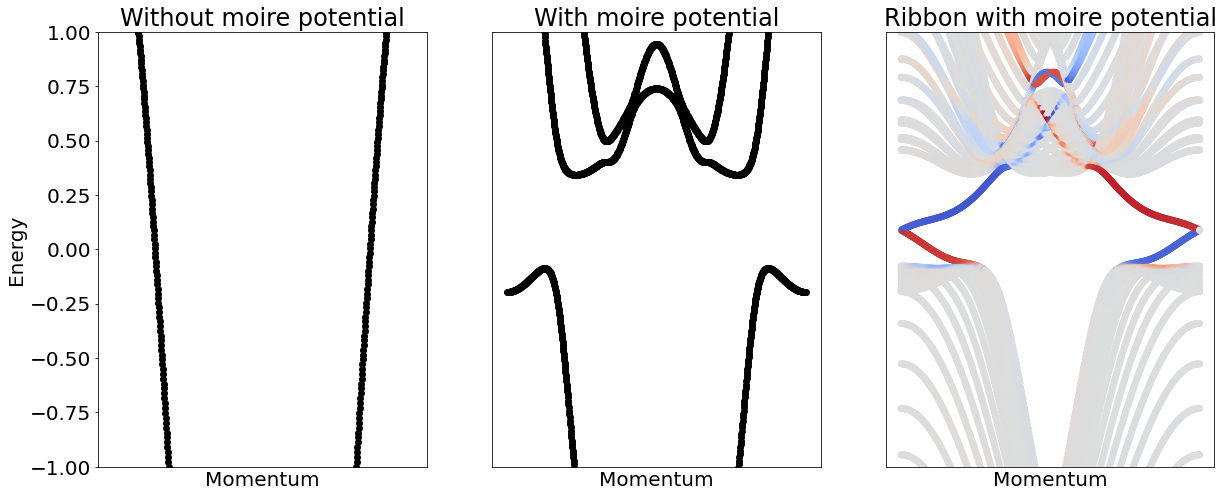

In [19]:
# use a triangular lattice 
from pyqula import potentials
g = geometry.triangular_lattice() # generate chain
N = 3 # size of the supercell
g = g.get_supercell((N,N)) # generate a supercell
# let us define a potential that is commensurate with the lattice
fpot = potentials.commensurate_potential(g,minmax=[0.,13.])
mz = np.mean([fpot(r) for r in g.r]) # average value as a reference

plt.subplot(1,3,1)
plt.title("Without moire potential")
h = g.get_hamiltonian() # and generate the Hamiltonian
h.add_rashba(2.0) # add Rashba SOC
h.add_exchange([0.,0.,mz]) # add uniform exchange field
(k,e) = h.get_bands(nk=1000) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.]) 

plt.subplot(1,3,2)
plt.title("With moire potential")
h = g.get_hamiltonian() # and generate the Hamiltonian
h.add_rashba(2.0) # add Rashba SOC
h.add_exchange(fpot) # and add an exchange modulation following this profile
(k,e) = h.get_bands(nk=1000) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ;  plt.xticks([]) ; plt.ylim([-1.,1.]) ; plt.yticks([])

from pyqula import ribbon
plt.subplot(1,3,3)
plt.title("Ribbon with moire potential")
h = ribbon.bulk2ribbon(h,n=20) # generate the Hamiltonian of a ribbon
(k,e,c) = h.get_bands(operator="yposition",num_bands=40) # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ;  plt.xticks([]) ; plt.yticks([]) ; plt.ylim([-1.,1.]) 

### Exercise
- Show that in the absence of a moire potential, the ribbon does not show topological edge states
- Discuss how you can rationalize that the moire potential gives rise to a topological state

## Moire-driven van Hove singularities in 2D materials
Let us now see how a moire pattern can drive a correlated state by creating a nearly flat band with a large density of states

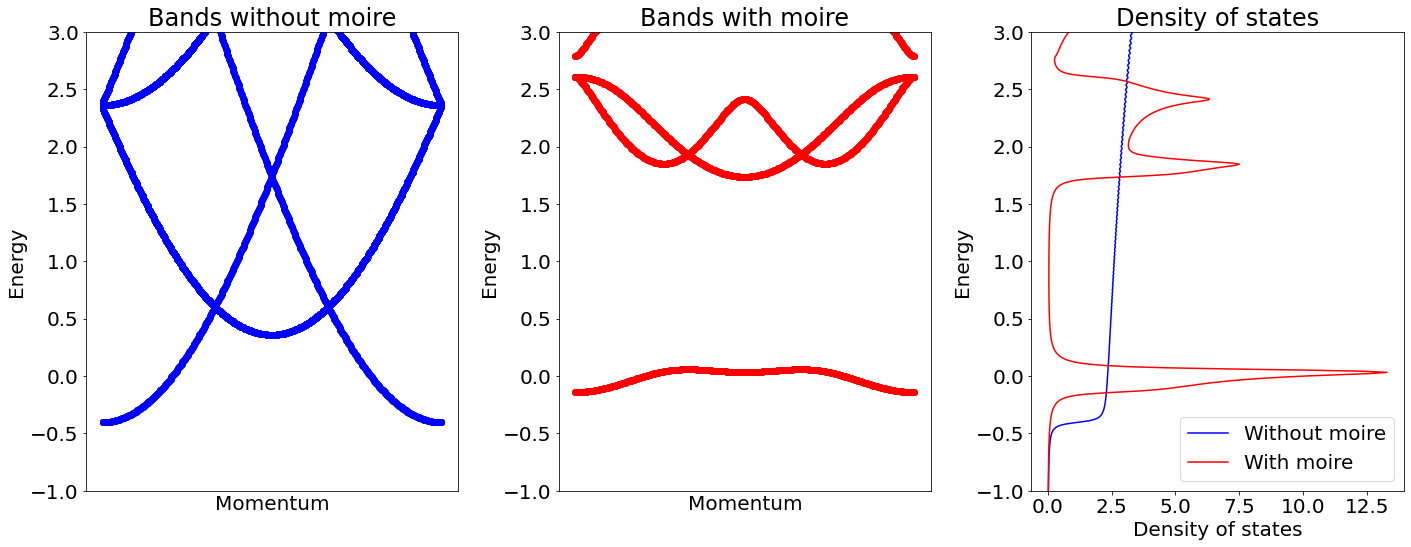

In [20]:
from pyqula import potentials

N = 5 # size of the supercell
g = geometry.triangular_lattice() # generate a triangular lattice
g = g.get_supercell((N,N)) # generate a supercell
h = -g.get_hamiltonian() # generate the Hamiltonian (not the minus sign to have the Gamma point at the bottom)
fpot = -potentials.commensurate_potential(g,minmax=[0.,5.]) # potential (note the minus sign)
energies=np.linspace(-1.,3.,400) # energies for DOS

# first without the moire
# plot the bands
plt.subplot(1,3,1) ; plt.title("Bands without moire")
h.set_filling(.5/N**2) # set the filling at the bottom band
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="blue") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
# plot the DOS
plt.ylim([np.min(energies),np.max(energies)]) 
plt.subplot(1,3,3)
(e,d) = h.get_dos(energies=energies,delta=2e-2)
plt.plot(d,e,c="blue",label="Without moire") 
plt.ylim([np.min(energies),np.max(energies)]) 

# now the case with a moire
h.add_onsite(fpot) # add the moire potential
h.set_filling(.5/N**2) # set the filling at the bottom band
plt.subplot(1,3,2) ; plt.title("Bands with moire")
# plot the bands
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="red") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([])
plt.ylim([np.min(energies),np.max(energies)]) 
# plot the DOS
plt.subplot(1,3,3) ; plt.title("Density of states")
(e,d) = h.get_dos(energies=energies,delta=2e-2)
plt.plot(d,e,c="red",label="With moire") ; plt.ylabel("Energy") ; plt.xlabel("Density of states")
plt.ylim([np.min(energies),np.max(energies)]) 
plt.legend(); plt.tight_layout() # adjust subplots

### Exercise
- Change the value of the moire potential. How does the band structure and density of states changes?
- Increase the size of the supercell keeping the same potential. Do the bands become flatter or wider?
- Replace the triangular lattice by a square lattice, and show that flat bands also appear in that case

## Moire-driven interacting states in 2D materials
Let us now take the moire superlattice above, and add electronic interactions. We will see that in the absence of interactions there is no symmetry breaking, whereas with electronic interactions a correlated insulating state appears

(-0.5, 2.0)

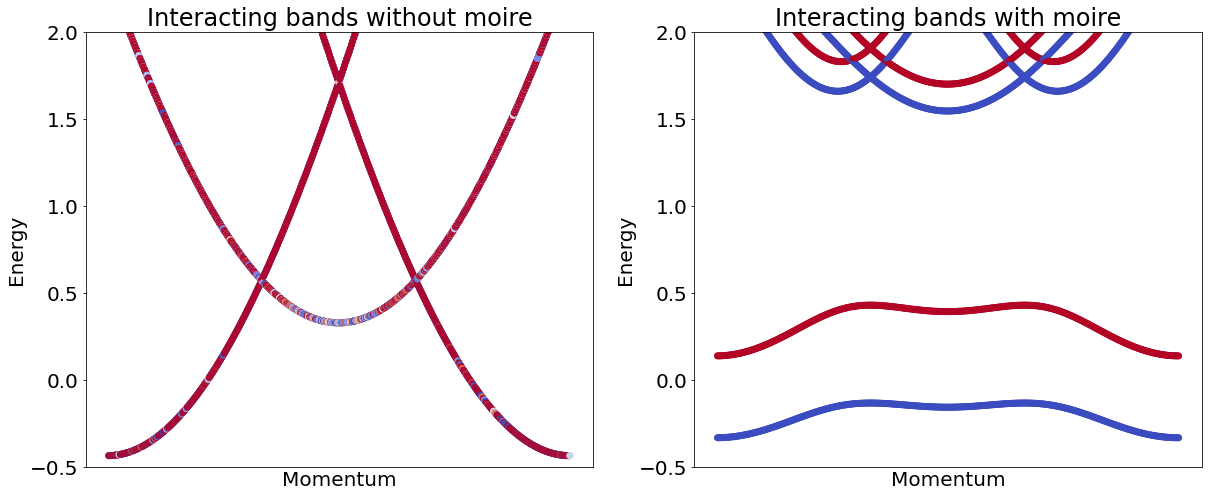

In [21]:
N = 5 # size of the supercell
g = geometry.triangular_lattice() # generate a triangular lattice
g = g.get_supercell((N,N)) # generate a supercell
h = -g.get_hamiltonian() # generate the Hamiltonian (not the minus sign to have the Gamma point at the bottom)
fpot = -potentials.commensurate_potential(g,minmax=[0.,5.]) # potential (note the minus sign)
energies=np.linspace(-1.,3.,400) # energies for DOS
filling = .5/N**2 # lowest band half filled

# function to obtain interacting Hamiltonian
get_hscf = lambda h: h.get_mean_field_hamiltonian(U=4.0,mix=0.9,mf="ferro",filling=filling) # perform SCF

# first without the moire
# plot the interacting bands
plt.subplot(1,2,1) ; plt.title("Interacting bands without moire")
hscf = get_hscf(h) # get SCF Hamiltonian
(k,e,c) = hscf.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-.5,2.])

# now the case with a moire
h.add_onsite(fpot) # add the moire potential
plt.subplot(1,2,2) ; plt.title("Interacting bands with moire")
# plot the bands
hscf = get_hscf(h) # get SCF Hamiltonian
(k,e,c) = hscf.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-.5,2.])

### Exercise
- Reduce the strength of the moire potential, and show that at a critical value the moire system becomes metallic
- For the reduced moire potential above, increase the size of the supercell, and show that an increased supercell leads to a correlated state again
- How can you understand the previous phenomenology?
- Make the filling of the system twice as big. What happens and how can it be understood?